In [32]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

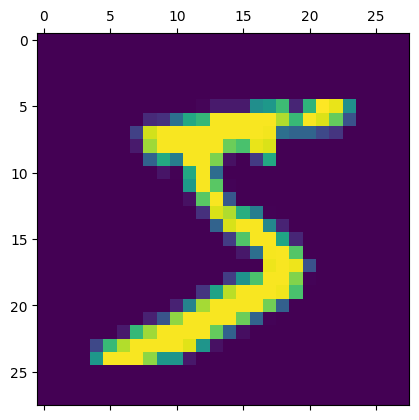

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

**Normalize**

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4254 - accuracy: 0.8906
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2088 - accuracy: 0.9399
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1562 - accuracy: 0.9555
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1234 - accuracy: 0.9650
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1007 - accuracy: 0.9714
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0838 - accuracy: 0.9763
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0707 - accuracy: 0.9802
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0601 - accuracy: 0.9830
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0517 - accuracy: 0.9862
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.044

In [25]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0809 - accuracy: 0.9735


[0.08088605850934982, 0.9735000133514404]

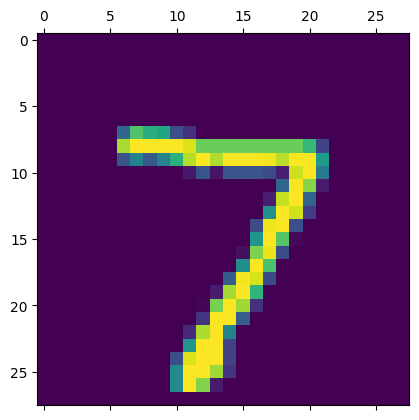

In [27]:
plt.matshow(X_test[0])

In [26]:
y_predicted = model.predict(X_test)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([1.5703428e-03, 3.4507776e-03, 4.3159693e-02, 8.3697325e-01,
       4.5936926e-05, 4.2641234e-02, 2.0542026e-07, 9.9948281e-01,
       2.3241013e-02, 1.8508394e-01], dtype=float32)

In [28]:
np.argmax(y_predicted[0])

7

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [30]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    2,    0,    0,    1,    3,    2,    2,    1],
       [   0, 1124,    3,    1,    0,    1,    3,    0,    3,    0],
       [   7,    1, 1002,    4,    1,    0,    4,    6,    6,    1],
       [   1,    0,    2,  992,    0,    2,    1,    5,    2,    5],
       [   3,    0,    0,    2,  941,    0,    8,    2,    2,   24],
       [   4,    1,    0,   18,    1,  855,    6,    1,    4,    2],
       [   8,    2,    3,    0,    4,    3,  934,    0,    4,    0],
       [   1,    8,    9,    5,    1,    0,    0,  993,    1,   10],
       [   5,    0,    3,    9,    3,    3,    3,    4,  942,    2],
       [   2,    5,    0,    5,    7,    4,    0,    2,    1,  983]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

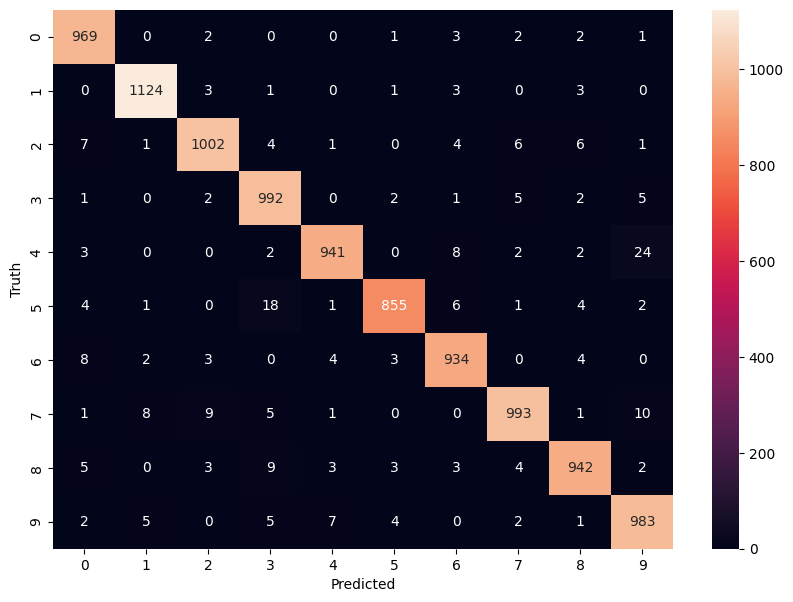

In [33]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')